<a href="https://colab.research.google.com/github/ribeiroenzo/PUC-MBA/blob/main/MVP_Sprint1_EnzoRibeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint: Análise de Dados e Boas Práticas - Enzo Ribeiro

## Definição do problema

1. Qual é a descrição do problema?
2. Este é um problema de aprendizado supervisionado ou não supervisionado?
3. Que premissas ou hipóteses você tem sobre o problema?
4. Que restrições ou condições foram impostas para selecionar os dados?
5. Defina cada um dos atributos do dataset.


1. Esse MVP se baseia em dados do Mercado de Luxo de Cosméticos no Brasil. O problema principal é entender o que tem desacelerado o mercado no year-to-date de 2023 e se isso foi uma tendência dos últimos anos ou é um movimento novo no mercado.
2. Este é um problema de aprendizado não supervisionado, mas que pode ser incrementado com análises preditivas sobre como seria a tendência para os anos seguintes;
3. Eu tenho a hipótese que o mercado Online está bem desacelerado versus os últimos anos e que atualmente os consumidores procuram mais a Sephora (que se enquadra no Other B&M) para comprar produtos de beleza.
4. Esses dados possuem confidencialidade, logo foi necessário tirar colunas que possuiam um maior número de detalhe e manipular, antes da importação, os valores de venda, se retratando, então, de dados fictícios.
5.
*   'Channel': canal de vendas, pode ser físico (Department Stores ou Other B&M) ou Online
*   'Company': nome da empresa
*   'Category': categoria do produto de beleza (fragrâncias, maquiagem ou skincare)
*   'Subcategory': subcategoria com detalhes adicionais
*   'Year', 'Month': atributos referentes a data de venda
*   'U', '$': venda em unidades e valor (representado em reais)
       

## Análise de dados | Estatísticas descritivas

* Quantos atributos e instâncias existem?
* Quais são os tipos de dados dos atributos?
* Verifique as primeiras linhas do dataset. Algo chama a atenção?
* Há valores faltantes, discrepantes ou inconsistentes?
* Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

### Importação e limpeza do dataset

In [2]:
# importação
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

Agora iremos importar o dataset com que iremos utilizar a partir do drive, e armazenaremos os dados em um dataframe. Neste prática, trabalharemos com o dataset **Mercado**, um dos datasets mais utlizados no contexto profissional do autor. Alguns dados foram ocultos e os valores alterados para manter a confidencialidade.

In [3]:
mercado = pd.read_csv('https://raw.githubusercontent.com/ribeiroenzo/PUC-MBA/main/Base_Mercado.csv',sep=';')

Inicialmente, iremos utilizar alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset. Os comentários nos blocos de código auxiliam no seu entendimento.

In [4]:
# verificando que mercado é um dataframe
type(mercado)

pandas.core.frame.DataFrame

In [5]:
mercado.head()

,Channel,Company,Category,Subcategory,Year,Month,U,$
0,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Jan,100,1985
1,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Feb,106,1976
2,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Mar,274,2290
3,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Apr,141,2840
4,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,May,42,1061


In [6]:
mercado.tail()

,Channel,Company,Category,Subcategory,Year,Month,U,$
56419,Department Stores,Vizcaya,Women fragrances,EDT/eau de toilette,2023,May,3,898
56420,Department Stores,Vizcaya,Women fragrances,EDT/eau de toilette,2023,Jun,2,585
56421,Department Stores,Vizcaya,Women fragrances,EDT/eau de toilette,2023,Jul,4,1238
56422,Department Stores,Vizcaya,Women fragrances,EDT/eau de toilette,2023,Aug,2,515
56423,Department Stores,Vizcaya,Women fragrances,EDT/eau de toilette,2023,Sep,3,1061


In [7]:
# eliminando linhas que tenham TODOS os valores missing
mercado = mercado.dropna(how='all')

In [8]:
mercado_with_nulls = mercado.loc[mercado.isnull().any(axis=1)]
mercado_with_nulls

,Channel,Company,Category,Subcategory,Year,Month,U,$


Aqui podemos ver que não há nenhuma linha parcialmente vazia. Logo, não precisamos nos preocupar com missings na análise exploratória.

### Verificação das características

In [9]:
# verificando os tipos de cada coluna do dataframe
mercado.dtypes

Channel        object
Company        object
Category       object
Subcategory    object
Year            int64
Month          object
U               int64
$               int64
dtype: object

In [10]:
# exibindo os nomes das colunas
mercado.columns

Index(['Channel', 'Company', 'Category', 'Subcategory', 'Year', 'Month', 'U',
       '$'],
      dtype='object')

In [11]:
# exibindo as dimensões do dataset
mercado.shape

(56424, 8)

O Dataset analisado contém 56.424 linhas e 8 colunas. Entre essas colunas, existem 6 atributos ['Channel', 'Company', 'Category', 'Subcategory', 'Year', 'Month'] e 2 instâncias ['U', '$'].

In [12]:
# exibindo a quantidade de linhas por coluna
mercado.count()

Channel        56424
Company        56424
Category       56424
Subcategory    56424
Year           56424
Month          56424
U              56424
$              56424
dtype: int64

In [13]:
# exibindo um sumário estatístico
mercado.describe()

,Year,U,$
count,56424.000000,56424.000000,5.642400e+04
mean,2020.869470,718.694580,1.848456e+05
std,1.372877,2597.789763,7.540377e+05
min,2019.000000,1.000000,0.000000e+00
25%,2020.000000,10.000000,2.575750e+03
50%,2021.000000,54.000000,1.280450e+04
75%,2022.000000,347.000000,7.471550e+04
max,2023.000000,80722.000000,2.642719e+07


Com essa visão, é possível perceber que o DataSet contém dados desde 2019 até 2023 de vendas do mercado de Luxo. Além disso, nota-se que a menor venda de uma empresa em um mês de uma subcategoria é de 1 unidade e a maior é de 80.722 unidades.

### Análise inicial e adição de colunas

A fim de analisarmos os nossos dados de diversos ângulos, o Pandas permite reorganizarmos um dataframe, por exemplo, ordenando-o por alguma coluna. Também podemos selecionar uma ou mais colunas e/ou linha específicas, como mostram os exemplos a seguir. Os comentários nos blocos de código auxiliam no seu entendimento.

In [14]:
# ordenando o dataframe por uma coluna
mercado.sort_values(by='$', ascending=False)

,Channel,Company,Category,Subcategory,Year,Month,U,$
7621,Online,L'Oréal Brasil,Women fragrances,EDP/eau de parfum,2022,Nov,80722,26427190
55507,Department Stores,Puig Brasil,Women fragrances,EDP/eau de parfum,2022,Dec,49810,22756235
55495,Department Stores,Puig Brasil,Women fragrances,EDP/eau de parfum,2021,Dec,47388,19554271
7609,Online,L'Oréal Brasil,Women fragrances,EDP/eau de parfum,2021,Nov,61888,18486815
55324,Department Stores,Puig Brasil,Men fragrances,EDT/eau de toilette,2021,Dec,40691,17988069
...,...,...,...,...,...,...,...,...
26593,Other B&M,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2022,Mar,1,1
56143,Department Stores,TFS,Women fragrances,EDT/eau de toilette,2021,Aug,2,0
40938,Other B&M,Other Exclusives,Men fragrances,Other men ancillaries,2019,Jan,1,0
40824,Other B&M,Other Exclusives,Men fragrances,Aftershave,2020,Jun,1,0


Com essa visão acima, é possível concluir que historicamente os meses com maiores vendas para o mercado de beleza de Luxo são puxados pela categoria Women Fragrances. Além disso, observa-se que a L'Oréal é a empresa que mais vende em Novembro no canal Online e a Puig é a empresa que mais vende em Dezembro no canal de Dept. Stores.

In [15]:
mercado_company = mercado.groupby(['Company','Year','Month']).sum()
mercado_company.sort_values(by='$', ascending=False)

<ipython-input-15-03da5f092787>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mercado_company = mercado.groupby(['Company','Year','Month']).sum()


U          $
Company        Year Month                   
Puig Brasil    2022 Dec    263461  113998390
                    Nov    250834   96840175
               2021 Dec    251729   96641654
L'Oréal Brasil 2022 Dec    229881   83786987
                    Nov    260636   83531055
...                           ...        ...
Alfaparf       2019 Jun         2         11
                    Mar         1          8
                    Jan         1          8
                    Dec         1          6
                    Aug         1          6

[1679 rows x 2 columns]

Se agruparmos por 'Company', nota-se que historicamente a empresa PUIG lidera o top 3 de maiores vendas mensais, com sua ótima performance em Dezembro e Novembro de 2022 e Dezembro de 2021. Em seguida, vem a L'Oréal com Dezembro e Novembro de 2022. Sendo assim, percebe-se que as sazonalidades de Dezembro (Natal) e Novembro (Black Friday) são importantes para as duas empresas.

In [16]:
mercado_category = mercado.groupby(['Category','Year','Month']).sum()
mercado_category.sort_values(by='$', ascending=False)

<ipython-input-16-d04d6989e327>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mercado_category = mercado.groupby(['Category','Year','Month']).sum()


U          $
Category         Year Month                   
Women fragrances 2022 Dec    424728  175044994
                      Nov    450737  161885222
                 2021 Dec    388503  144707137
                      Nov    395769  127390000
Men fragrances   2022 Dec    283494  122492809
...                             ...        ...
Skincare         2019 Jan     42049   10024870
                      Feb     41085    9793087
                 2020 Mar     37520    9528502
                      Apr     33736    7766959
Men fragrances   2020 Apr     22530    6449656

[228 rows x 2 columns]

Se agruparmos por 'Category', nota-se que historicamente a categoria de produtos de beleza mais vendida em um mês é a categoria de Fragrâncias Femininas (entre fragrancias fem, masc, maquiagem e tratamento de pele), com sua ótima performance em Dezembro e Novembro de 2022 e Dezembro e Novembro de 2021. Sendo assim, percebe-se que as sazonalidades de Dezembro (Natal) e Novembro (Black Friday) são importantes para essa categoria.

In [17]:
from typing_extensions import Text
# Mapeamento entre nomes reduzidos dos meses em inglês e seus números
meses = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Aplicando o mapeamento para criar a nova coluna
mercado['Month_Num'] = mercado['Month'].map(meses)

Neste exemplo, estamos criando um dicionário (meses) que mapeia os nomes reduzidos dos meses em inglês para seus números correspondentes e, em seguida, estamos usando o método map do Pandas para criar uma nova coluna chamada "Numero_Mes" no DataFrame "mercado" com os números dos meses correspondentes aos nomes em inglês. Isso é importante para quando formos analisar os meses com operações como maior ou igual.

In [18]:
# selecionando uma coluna específica
coluna_selecionada = mercado['Company']

# Remove as linhas duplicadas da coluna selecionada
coluna_sem_duplicatas = coluna_selecionada.drop_duplicates()
coluna_sem_duplicatas

0               Aeger Comercial e Importaczo Ltda
167                                         Ahava
613                                          Amyi
631                                        Amyris
1290                                  Bird Brasil
1334                                     Caudalie
1628                                  Coty Brasil
1877                          Estée Lauder Brasil
5443                                   Excellence
5620                  Exi Exportaçao e Importaçao
5806                            Felisa Cosmeticos
5807                             Galia Prime Care
5854                              Ilumiage Beauty
5871     K.PRO Profissional Com. de Cosmeticos Lt
5878                            Laboratoires Osma
5890                                   LMG Lasers
5973                               L'Oréal Brasil
7857                                       Lowell
7858                                  LVMH Brasil
11131                                 Moroccanoil


In [19]:
coluna_sem_duplicatas.count()

52

Assim, é possível entender quais são as 52 empresas que são analisadas nesse dataset.

In [20]:
# selecionando linhas segundo um critério
ano_atual = mercado[mercado['Year'] == 2023]

meses_ano_atual = ano_atual['Month']

# Remove as linhas duplicadas da coluna selecionada
coluna_sem_duplicatas2 = meses_ano_atual.drop_duplicates()
coluna_sem_duplicatas2

48     Jan
49     Feb
50     Mar
51     Apr
52     May
53     Jun
54     Jul
55     Aug
166    Sep
Name: Month, dtype: object

Dessa forma, observa-se que só temos os dados até Setembro de 2023. Isso é importante para quando formos fazer comparação ano vs ano, pois não é justo comparar o ano inteiro de 2022 com o 2023 apenas de jan-set. Por isso, irei criar uma coluna com uma flag de YTD/YTG.

In [21]:
# Função para determinar se é YTD ou YTG
def ytd_ytg(Month_Num):
    if Month_Num <= 9:  # Se o mês for menor ou igual a setembro (9)
        return 'YTD'  # É YTD
    else:
        return 'YTG'  # Senão, é YTG

# Adicionando a coluna 'YTD_YTG' com base no valor do mês
mercado['YTD_YTG'] = mercado['Month_Num'].apply(ytd_ytg)

## Análise de dados | Visualizações

* Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).
* Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
* Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.


### Verificação da distribuição

In [22]:
# importação do pyplot e do seaborn
import matplotlib.pyplot as plt
import seaborn as sns

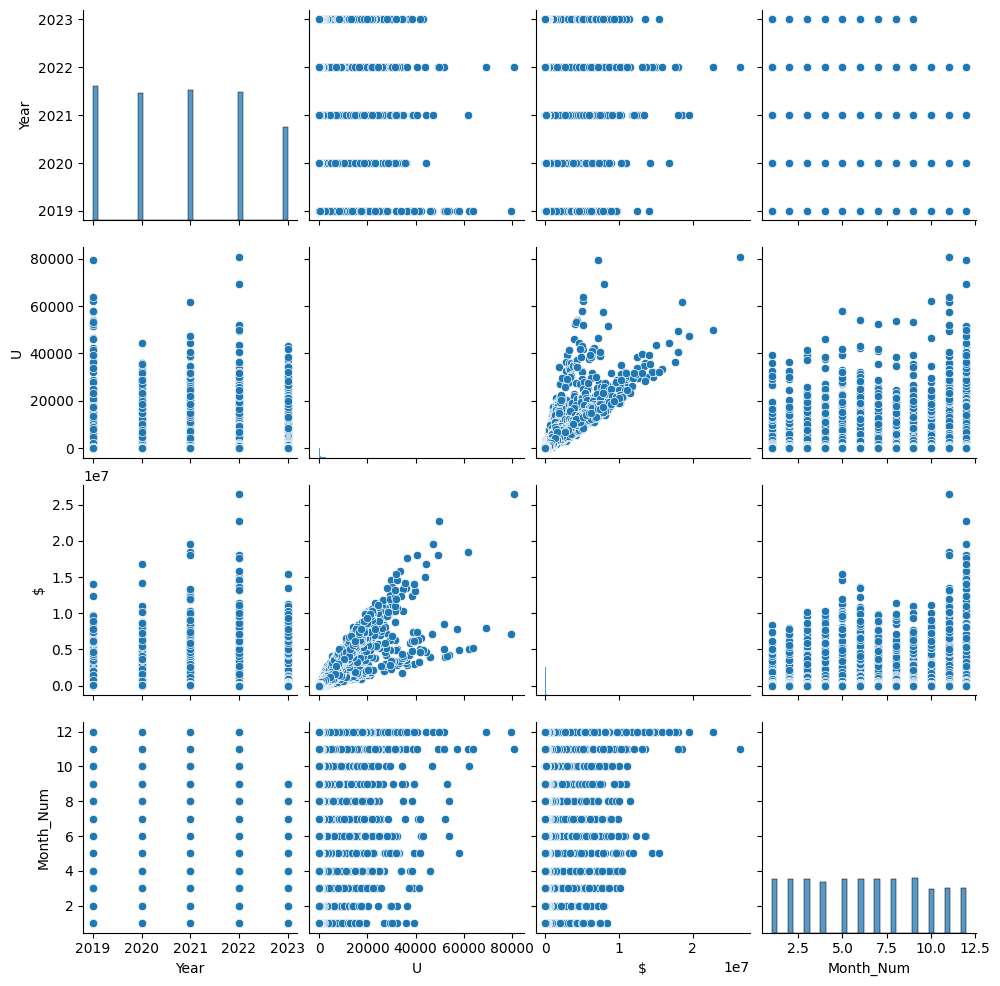

In [23]:
sns.pairplot(mercado)

É possível perceber que os meses com maior venda de valor são: Dezembro (Natal), Novembro (Black Friday) e Maio (dia das Mães).

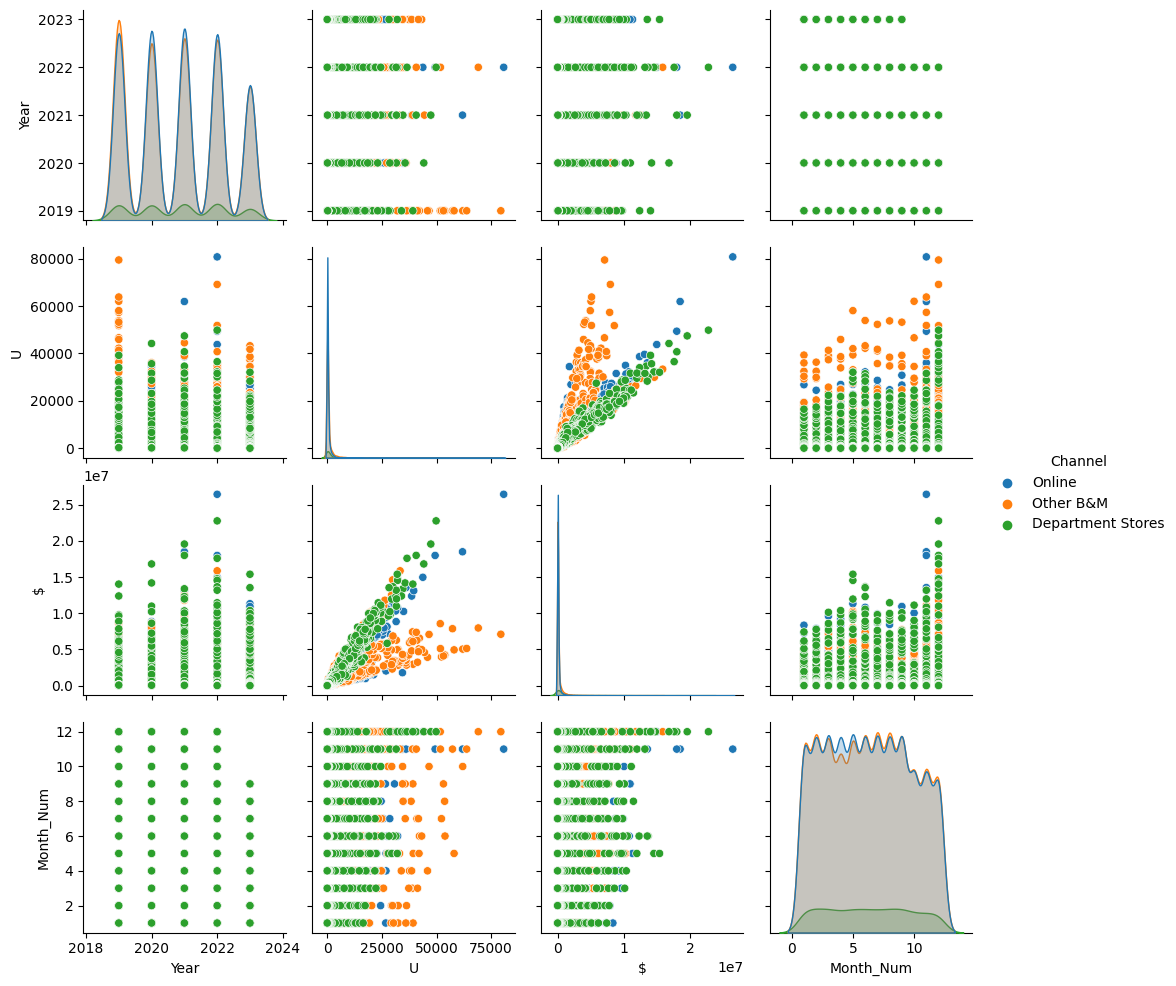

In [24]:
sns.pairplot(mercado, hue='Channel')

Essa visualização é super interessante porque nos permite tirar algumas conclusões rápidas em relação a coluna $:
* 2022 foi o único ano que o canal Online foi o canal com mais vendas, nos outros anos os maiores valores vem de Department Stores;
* O canal de Other B&M pratica os menores preços médios, porque no gráfico Valor x Und é possível ver que para uma mesma linha de valor, o canal de Department Stores tem que vender menos unidades que o Online que vende menos que o Other B&M;
* Os meses com as maiores vendas registradas são: Novembro, Dezembro e Maio. Nesses meses, o Online é o que atingiu o maior valor no mês da Black Friday e Department Stores segue no topo nos outros dois.

Sendo assim, vamos analisar a distribuição das colunas U e $.

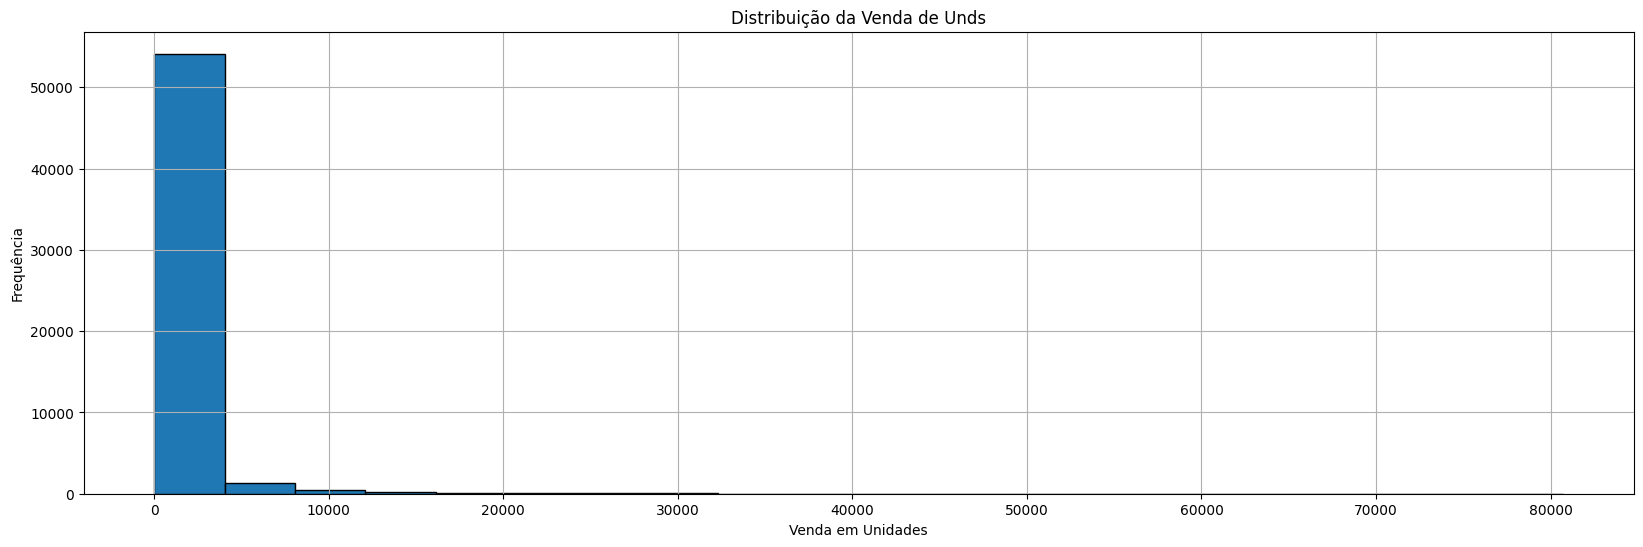

In [25]:
# Crie um histograma para visualizar a distribuição da coluna 'U'
plt.figure(figsize=(20, 6))  # Define o tamanho da figura
plt.hist(mercado['U'], bins=20, edgecolor='black')  # Cria o histograma com 20 bins
plt.xlabel('Venda em Unidades')  # Nome do eixo x
plt.ylabel('Frequência')  # Nome do eixo y
plt.title('Distribuição da Venda de Unds')  # Título do gráfico
plt.grid(True)  # Adiciona grades ao gráfico

plt.show()  # Mostra o gráfico

Esses gráficos de distribuição não trazem conclusões concretas, apenas mostram que grande parte das vendas são registradas entre 0 e 5.000 unidades. Vamos agrupar a visão por mês para ver se facilita o entendimento e, assim, podemos identificar alguma tendência.

<ipython-input-29-fcd6fcb43186>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unds_ano_mes = mercado.groupby(['Year', 'Month']).sum()


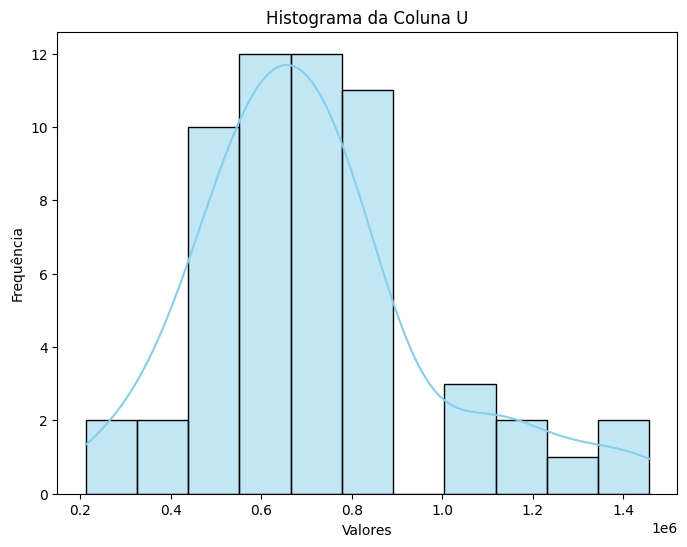

In [29]:
unds_ano_mes = mercado.groupby(['Year', 'Month']).sum()

# Criando um histograma da coluna 'U' normalizada
plt.figure(figsize=(8, 6))
sns.histplot(unds_ano_mes['U'], kde=True, color='skyblue')
plt.title('Histograma da Coluna U')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

Como a distribuição não é padrão, irei normalizar o gráfico para facilitar a identificação de tendências. O que podemos observar com facilidade no gráfico acima é que o número de venda em unidades mensal com maior frequência gira em torno de 700.000 unidades.

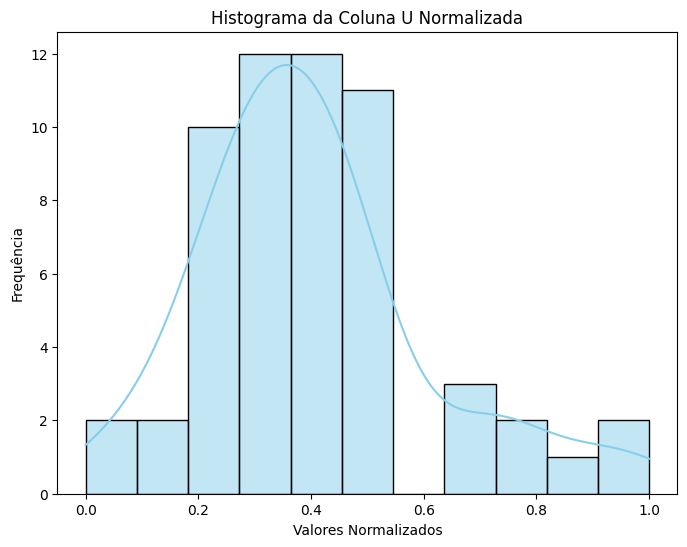

In [33]:
scaler = MinMaxScaler()
normalizado_unds_ano_mes = unds_ano_mes
normalizado_unds_ano_mes['U_normalizado'] = scaler.fit_transform(unds_ano_mes[['U']])

# Criando um histograma da coluna 'U' normalizada
plt.figure(figsize=(8, 6))
sns.histplot(normalizado_unds_ano_mes['U_normalizado'], kde=True, color='skyblue')
plt.title('Histograma da Coluna U Normalizada')
plt.xlabel('Valores Normalizados')
plt.ylabel('Frequência')
plt.show()

O gráfico normalizado só reforça que a distribuição entre 0 e 1 tem a frequência altamente concentrada entre 0.2 e 0.5 e que é mais comum encontrar valores após o ponto máximo que está em torno de x = 0.35

A distribuição da coluna de $ pode ou não seguir uma forma similar, por conta da diferença do AUV praticado no mês a mês, que é o preço vendido. Dessa forma, não necessariamente em um mês que eu tive mais unidades vendidas, o valor foi maior, pois o AUV pode ter sido mais baixo.

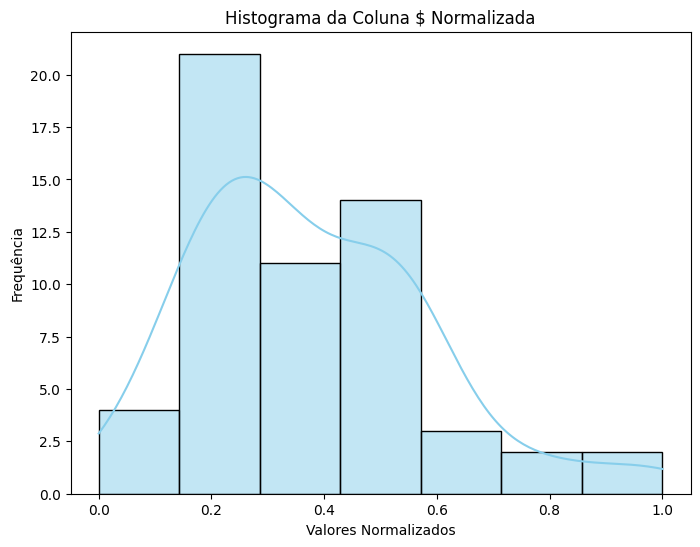

In [34]:
normalizado_unds_ano_mes['$_normalizado'] = scaler.fit_transform(unds_ano_mes[['$']])

# Criando um histograma da coluna 'U' normalizada
plt.figure(figsize=(8, 6))
sns.histplot(normalizado_unds_ano_mes['$_normalizado'], kde=True, color='skyblue')
plt.title('Histograma da Coluna $ Normalizada')
plt.xlabel('Valores Normalizados')
plt.ylabel('Frequência')
plt.show()

Com isso, fica claro que a variação do preço vendido é um fator relevante e que afeta diretamente as vendas do mercado de luxo. Vamos buscar mais detalhes sobre essa variável após fazer a análise descritiva inicial.

### Visualizações e análise descritiva

A partir disso, vamos analisar todas as informações que temos à disposição para entender o comportamento do mercado de luxo no ano de 2023, com comparações YoY, MoM, por categoria, canal e empresa.

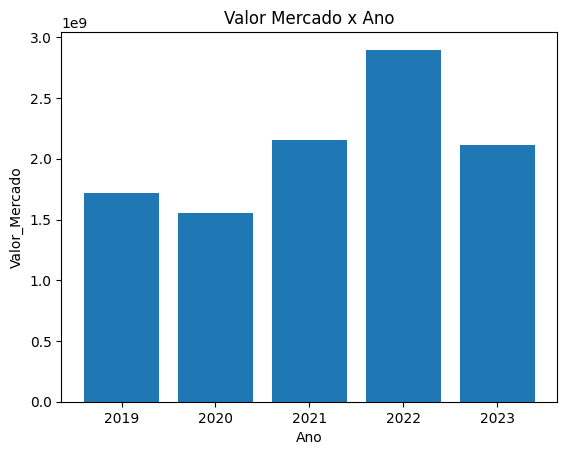

In [35]:
# plotando o gráfico de valor por ano
soma_valor = mercado.groupby('Year')['$'].sum()
plt.bar(soma_valor.index, soma_valor.values)

# incluindo título do gráfico e rótulos dos eixos
plt.title('Valor Mercado x Ano')
plt.xlabel('Ano')
plt.ylabel('Valor_Mercado');

Nessa visão é possível observar a evolução dos valores do mercado de luxo de um ano para outro ano, porém não é válido comparar com 2023 tendo em vista que só tem valores até o mês 9. Sendo assim, é válida uma comparação apenas do YTD e colocar uma linha com a evolução para facilitar a visualização.

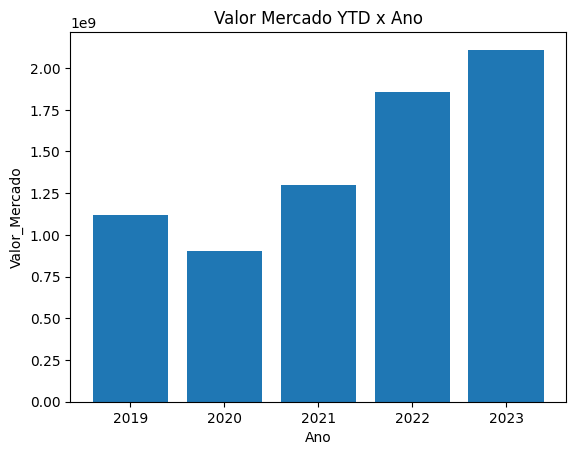

In [36]:
mercado_ytd = mercado[mercado['YTD_YTG'] =='YTD']

soma_valor_ytd = mercado_ytd.groupby('Year')['$'].sum()
plt.bar(soma_valor_ytd.index, soma_valor_ytd.values)

# incluindo título do gráfico e rótulos dos eixos
plt.title('Valor Mercado YTD x Ano')
plt.xlabel('Ano')
plt.ylabel('Valor_Mercado');

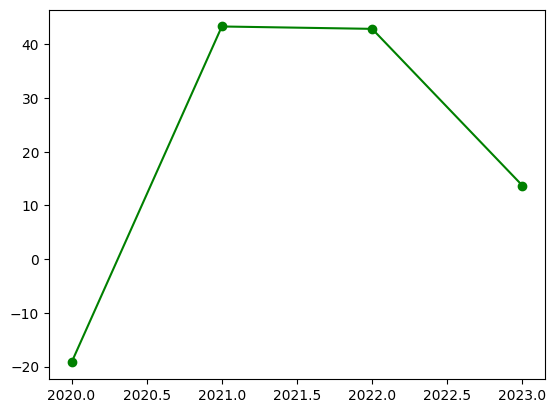

In [37]:
evolucao_YoY_ytd = soma_valor_ytd.pct_change() * 100
plt.plot(soma_valor_ytd.index, evolucao_YoY_ytd.values, marker='o', color='green', label='Evolução % vs Ano Anterior')

Agora eu tenho que juntar os dois gráficos para entender o movimento do mercado no YTD e a sua variação de forma unificada. Para isso, incluirei rótulo de dados para facilitar a visualização.

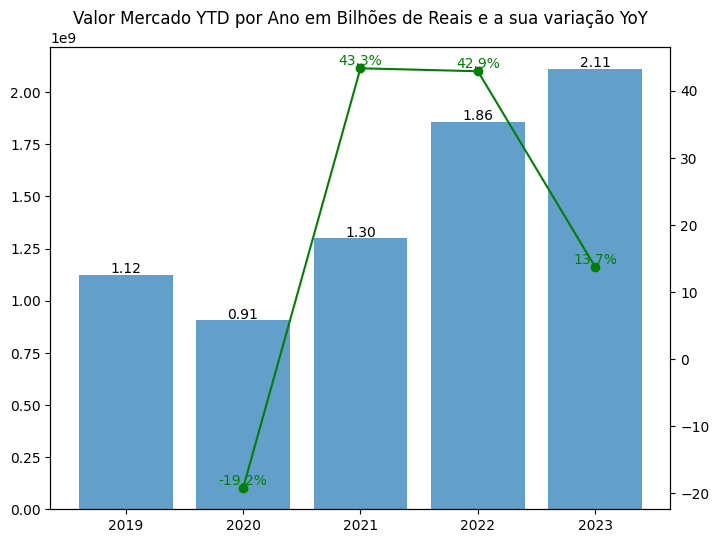

In [38]:

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(soma_valor_ytd.index, soma_valor_ytd.values,  alpha=0.7, label='Dados 1')

ax2 = ax1.twinx()

ax2.plot(soma_valor_ytd.index, evolucao_YoY_ytd.values, color='green', marker='o', label='Dados 2')

for p in ax1.patches:
  height = p.get_height()/1000000000
  ax1.text(p.get_x()+p.get_width()/2.,
  (height*1000000000) + 10000000,
  '{:0.2f}'.format((height)),
  ha='center')

for x, y in zip(soma_valor_ytd.index, evolucao_YoY_ytd.values):
    ax2.text(x, y, f'{y:.1f}%', ha='center', va='bottom', color='green')

plt.title('Valor Mercado YTD por Ano em Bilhões de Reais e a sua variação YoY')

plt.show()

Com essa visão, fica claro que o mercado de luxo está desacelerando versus a aceleração vista após a pandemia. Nos últimos 2 anos, o ytd teve uma variação acima de 40% e nesse ano o crescimento é de apenas 13,7%. Será que essa desaceleração vem de todos os canais ou um canal em específico?

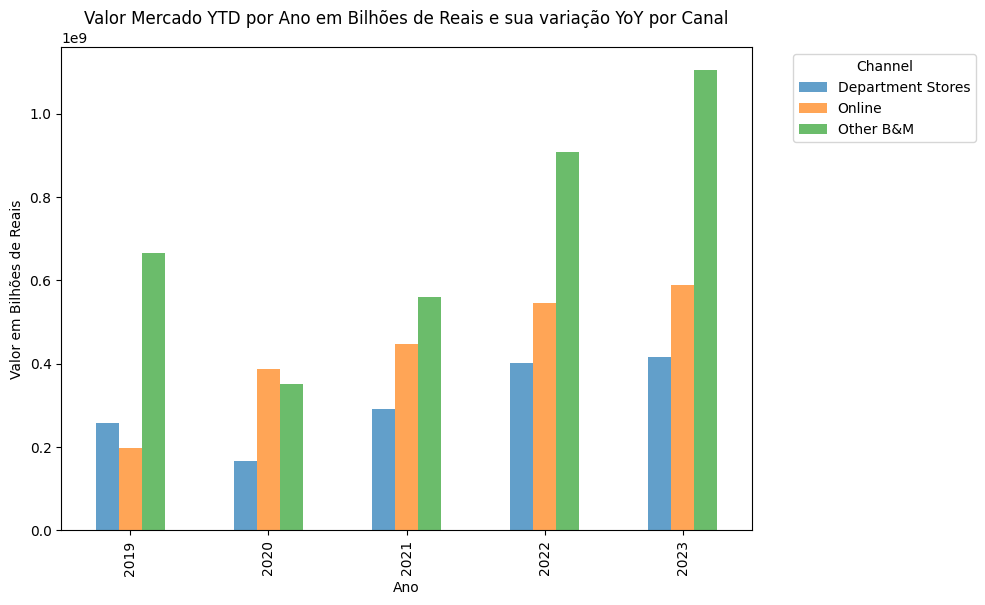

In [39]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Agrupando os dados por 'Channel' e 'Year' e somando os valores
mercado_ytd = mercado[mercado['YTD_YTG'] =='YTD']

#soma_valor_ytd = mercado_ytd.groupby('Year')['$'].sum()
soma_valor_ytd_por_canal = mercado_ytd.groupby(['Year', 'Channel'])['$'].sum().unstack()

# Plotando as barras agrupadas por 'Channel'
soma_valor_ytd_por_canal.plot(kind='bar', ax=ax1, alpha=0.7)

plt.title('Valor Mercado YTD por Ano em Bilhões de Reais e sua variação YoY por Canal')
plt.xlabel('Ano')
plt.ylabel('Valor em Bilhões de Reais')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Para não poluir muito o gráfico, irei colocar a tabela com as evoluções percentuais abaixo como uma informação adicional, para facilitar a análise.

In [40]:
evolucao_YoY_ytd_canal = soma_valor_ytd_por_canal.pct_change() * 100
evolucao_YoY_ytd_canal

Channel,Department Stores,Online,Other B&M
Year,,,
2019,NaN,NaN,NaN
2020,-35.586477,95.721349,-47.151075
2021,76.421019,15.025496,58.982462
2022,36.998996,22.419304,62.330303
2023,3.884399,7.877594,21.546990


Conclui-se que os canal que mais tem desacelerado o mercado de luxo é o de Department Stores, que são as lojas de departamento que vendem tanto no setor de fashion quanto no setor de perfumaria de luxo. Vamos fazer um deep dive de qual categoria é a mais afetada dentro do canal.

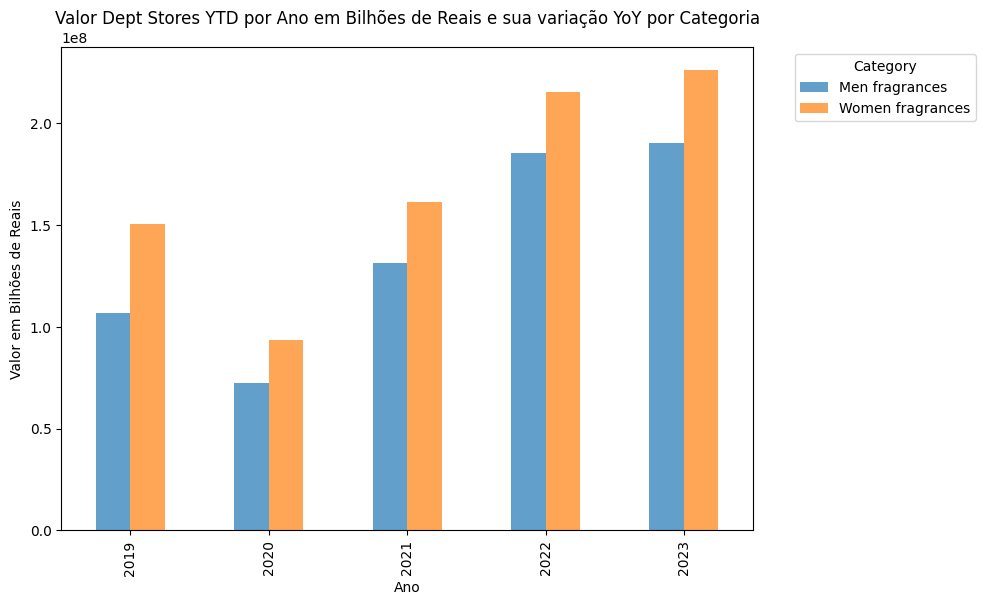

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))

mercado_ytd_dept = mercado_ytd[mercado_ytd['Channel'] =='Department Stores']

soma_valor_ytd_dept = mercado_ytd_dept.groupby(['Year', 'Category'])['$'].sum().unstack()

soma_valor_ytd_dept.plot(kind='bar', ax=ax1, alpha=0.7)

plt.title('Valor Dept Stores YTD por Ano em Bilhões de Reais e sua variação YoY por Categoria')
plt.xlabel('Ano')
plt.ylabel('Valor em Bilhões de Reais')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [42]:
evolucao_YoY_ytd_dept = soma_valor_ytd_dept.pct_change() * 100
evolucao_YoY_ytd_dept

Category,Men fragrances,Women fragrances
Year,,
2019,NaN,NaN
2020,-32.069433,-38.075344
2021,81.263482,72.661852
2022,41.069028,33.682060
2023,2.715451,4.889692


Assim, pode-se perceber que as duas categorias comercializadas no canal de Department Stores estão com crescimento desacelerado em 2023 com base no visto nos últimos anos, mas com maior desaceleração vindo de Department Stores. Vamos ver qual é a empresa que mais sofre com essa desaceleração do canal.

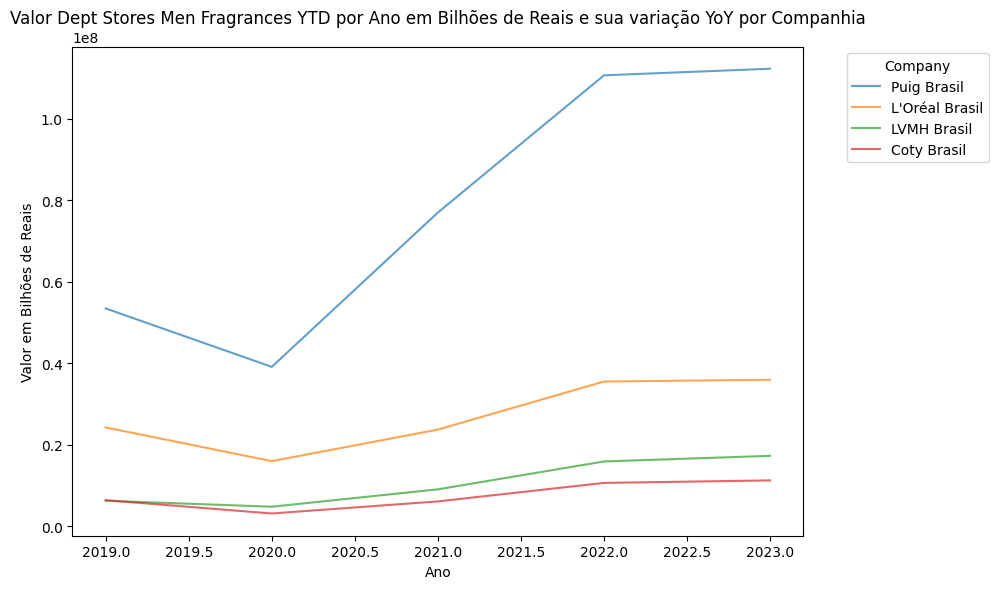

In [43]:
fig, ax1 = plt.subplots(figsize=(10, 6))

mercado_ytd_dept_men = mercado_ytd_dept[mercado_ytd_dept['Category'] =='Men fragrances']

soma_valor_ytd_dept_men = mercado_ytd_dept_men.groupby(['Year','Company'])['$'].sum().unstack()

soma_total_empresas = soma_valor_ytd_dept_men.sum(axis=0)
top_4_empresas = soma_total_empresas.nlargest(4).index.tolist()

soma_valor_ytd_dept_men_top4 = soma_valor_ytd_dept_men[top_4_empresas]

soma_valor_ytd_dept_men_top4.plot(kind='line', ax=ax1, alpha=0.7)

plt.title('Valor Dept Stores Men Fragrances YTD por Ano em Bilhões de Reais e sua variação YoY por Companhia')
plt.xlabel('Ano')
plt.ylabel('Valor em Bilhões de Reais')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [44]:
evolucao_YoY_ytd_dept_men = soma_valor_ytd_dept_men_top4.pct_change() * 100
evolucao_YoY_ytd_dept_men

Company,Puig Brasil,L'Oréal Brasil,LVMH Brasil,Coty Brasil
Year,,,,
2019,NaN,NaN,NaN,NaN
2020,-26.847446,-34.182089,-23.631385,-51.449951
2021,96.951288,48.630861,89.805399,96.159397
2022,43.767890,49.810397,75.963753,75.072833
2023,1.458999,1.250404,8.705297,5.808922


Assim, percebe-se que os 4 maiores players nesse mercado estão com crescimento super desacelerado versus o visto nos últimos anos. Vamos entender mais a fundo se isso está relacionado a um aumento do preço médio praticado no canal, que poderia estar causando uma perda de vendas.

### Análise diagnóstica

Vamos entender como o AUV praticado nesse canal pode ter influenciado a queda nas suas vendas de fragrância no ano de 2023.

In [45]:
mercado['AUV'] = (mercado['$'] / mercado['U']).round(1)
mercado_dept = mercado[mercado['Channel'] =='Department Stores']
mercado_dept.head()

,Channel,Company,Category,Subcategory,Year,Month,U,$,Month_Num,YTD_YTG,AUV
53085,Department Stores,Amyi,Women fragrances,EDP/eau de parfum,2021,Jun,1,374,6,YTD,374.0
53086,Department Stores,Amyi,Women fragrances,EDP/eau de parfum,2021,Jul,2,674,7,YTD,337.0
53087,Department Stores,Amyi,Women fragrances,EDP/eau de parfum,2021,Aug,3,1221,8,YTD,407.0
53088,Department Stores,Amyi,Women fragrances,EDP/eau de parfum,2021,Sep,3,1069,9,YTD,356.3
53089,Department Stores,Amyi,Women fragrances,EDP/eau de parfum,2021,Oct,1,379,10,YTG,379.0


Fazer analise identificado delta AUV no canal YoY e variação vs os outros canais em 2023.

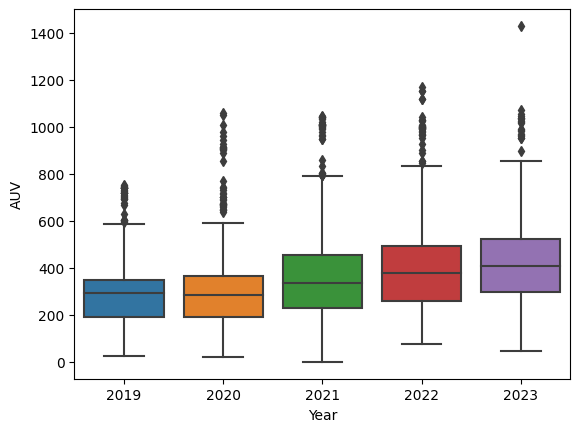

In [47]:
# scatter plot com Seaborn
sns.boxplot(x='Year', y='AUV', data=mercado_dept);

De fato é possível observar que o preço de vendas no canal de Department Stores está aumentando. Vamos entender se esse aumento está sendo maior do que nos outros canais, que estão com um crescimento mais acelerado.

In [62]:
mercado_channel = mercado.groupby(['Year','Channel']).sum()
mercado_channel['AUV']= (mercado_channel['$'] / mercado_channel['U']).round(1)

#soma_valor_ytd = mercado_ytd.groupby('Year')['$'].sum()
mercado_channel_auv = mercado_channel.groupby(['Year', 'Channel'])['AUV'].sum().unstack()

evolucao__canal_auv = mercado_channel_auv.diff()

mercado_channel_auv

<ipython-input-62-092d06d7895c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mercado_channel = mercado.groupby(['Year','Channel']).sum()


Channel,Department Stores,Online,Other B&M
Year,,,
2019,296.4,195.4,179.2
2020,324.2,208.6,214.2
2021,370.8,237.9,244.0
2022,427.2,275.0,261.1
2023,454.3,293.1,275.0


In [63]:
evolucao__canal_auv

Channel,Department Stores,Online,Other B&M
Year,,,
2019,NaN,NaN,NaN
2020,27.8,13.2,35.0
2021,46.6,29.3,29.8
2022,56.4,37.1,17.1
2023,27.1,18.1,13.9


Com essa visão, uma das hipóteses pode ser o aumento do preço de venda praticado maior que os outros canais. Por mais que essa tenha sido a realidade nos últimos 2 anos, pode ser que com a nova dinâmica de mercado o canal esteja perdendo consumidores por conta disso.

### Análise Preditiva

A próxima fase seria treinar o modelo para fazer uma análise preditiva do mercado, para projetar qual será o tamanho do mercado nos próximos meses, com a quebra entre canal e categoria. Esse tópico ficará no radar para resolução em uma próxima oportunidade.

In [67]:
from sklearn.model_selection import train_test_split

# Selecionando as colunas para usar como recursos (X) e alvo (y)
features = ['Year', 'Month', 'U', '$']
target = 'Category'

X = mercado[features]
y = mercado[target]

# Dividindo o conjunto de dados em treino e teste (por exemplo, 80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionando uma coluna 'Conjunto' ao DataFrame indicando se é treino ou teste
mercado['Conjunto'] = 'Treino'  # Definindo todos os registros inicialmente como 'Treino'
mercado.loc[X_test.index, 'Conjunto'] = 'Teste'  # Definindo os registros de teste como 'Teste'

# Verificando a contagem de registros em cada conjunto
print("Registros no conjunto de treino:", len(mercado[mercado['Conjunto'] == 'Treino']))
print("Registros no conjunto de teste:", len(mercado[mercado['Conjunto'] == 'Teste']))

Registros no conjunto de treino: 45139
Registros no conjunto de teste: 11285


In [68]:
mercado.head()

,Channel,Company,Category,Subcategory,Year,Month,U,$,Month_Num,YTD_YTG,AUV,Conjunto
0,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Jan,100,1985,1,YTD,19.8,Treino
1,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Feb,106,1976,2,YTD,18.6,Treino
2,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Mar,274,2290,3,YTD,8.4,Treino
3,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,Apr,141,2840,4,YTD,20.1,Treino
4,Online,Aeger Comercial e Importaczo Ltda,Skincare,BC Hands,2019,May,42,1061,5,YTD,25.3,Teste
